In [46]:
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Comparing Regents University Housing With County Rent

This analysis was inspired by the Urban Institute's ["Understanding College Affordability" report](http://collegeaffordability.urban.org/prices-and-expenses/room-and-board/#/), specifically the section on room and board.

The problem with this data is is that it is looking back to 2013, 2014. 

The Kansas Board of Regents unanimously passed [new room and board rates](https://www.kansasregents.org/resources/PDF/About/Board_Meetings/FY_2017/Agenda_Dec_20_2017_Board_Meeting.pdf) on December, 21st 2017 for the 2018-2019 academic years. 

To compare how these prices match up with local rents, I will be using the U.S. Department of Housing and Urban Development's [FY2018 Fair Market Rents (FMRs) estimates](https://www.huduser.gov/portal/datasets/fmr.html). 

There is a helpful ["field guide"](http://cityobservatory.org/a-field-guide-to-median-rent-statistics-contd/) from City Observatory about the estimates.



# Determining Rates



## Pittsburgh State University
To determine PSU's rate, I looked at the double room rate with 800 Dining Dollars Meal Plan on page 48 of the [Regents agenda](https://www.kansasregents.org/resources/PDF/About/Board_Meetings/FY_2017/Agenda_Dec_20_2017_Board_Meeting.pdf) and subtracted the 800 dollars. 

This rate is also for nine months (a full academic year). 

In [7]:
#
psu_18_19_rate = 6230 - 800
print("The PSU rate for a double occupancy room without a meal plan is ${}.".format(psu_18_19_rate))


The PSU rate for a double occupancy room without a meal plan is $5430.


## Kansas State University

Kansas State is easier since the report breaks apart room rates from meal plans on page 59. The rate was doubled since it is listed for one semester

In [9]:
ksu_18_19_rate = (2475*2)
print("The KSU rate for a double occupancy room without a meal plan is ${}.".format(ksu_18_19_rate))

The KSU rate for a double occupancy room without a meal plan is $4950.


## The University of Kansas
KU also breaks down by room on page 65. 

In [10]:
ku_18_19_rate = 6084
print("The KU rate for a double occupancy room without a meal plan is ${}.".format(ku_18_19_rate))

The KU rate for a double occupancy room without a meal plan is $6084.


## Wichita State University
The "2 shared bedroom suite/1 bath" can be found on page 72. 

In [11]:
wsu_18_19_rate = 6660
print("The WSU rate for a double occupancy room without a meal plan is ${}.".format(wsu_18_19_rate))

The WSU rate for a double occupancy room without a meal plan is $6660.


## Emporia State University
Emporia's rate for Morse can be found on page 57.

In [13]:
esu_18_19_rate = 4690
print("The ESU rate for a double occupancy room without a meal plan is ${}.".format(esu_18_19_rate))

The ESU rate for a double occupancy room without a meal plan is $4690.


## Fort Hays University
The Fort Hays rate can be found on page 52.

In [30]:
fhu_18_19_rate = 3864
print("The FHU rate for a double occupancy room without a meal plan is ${}.".format(fhu_18_19_rate))

The FHU rate for a double occupancy room without a meal plan is $3864.


# County Rent

I will be comparing double occupancy dorms to the mean between efficiency apartments and one bedrooms(both are medians). HUD appears to use efficiency to refer to any zero bedroom apartment. I will use the term studio instead since I believe it is the more common term. 

The most comparable situation to a student living in a double occupancy dorm room would be a studio apartment with a roommate. However, even this is a flawed comparison since studios have kitchens dorms often lack. To create a more conservative figure, I believe the average between studios and one bedrooms will be best (looking at the HUD numbers, there appears to be little price difference between the two in the counties I am observing anyway). It is also what is used by the Urban Institute in its analysis. 

Again, to get the county data, I will be using HUD's FY2018 Fair Market Rents (FMRs) estimates. 

I'll be comparing 2018 rents to academic year 2018-2019 because a student would likely start a lease in August or September 2018 that would remain steady through 2019, in the same way the universities will likely keep the same rates throughout the academic year.

The estimates present monthly rents so I will multiple them by 9 so it matches the academic year.

In [36]:
crawford_studio_18 = ((545+549)/2)*9
riley_studio_18 = ((762+767)/2)*9
#estimates for Riley include Pottawatomie County as well. 
douglas_studio_18 = ((577+640)/2)*9
ellis_studio_18 = ((539+559)/2)*9
lyon_studio_18 = ((446+524)/2)*9
sedgwick_studio_18 = ((515+609)/2)*9
#estimates for Sedgwick include Butler and Harvey Counties as well.

# Building the datasets

In [37]:
schools = [
    {
        "school":"Pittsburg State University",
        "county":"Crawford",
        "dorm rates": psu_18_19_rate,
        "county median estimate": crawford_studio_18
    
    },
    {
        "school":"Kansas State University",
        "county":"Riley",
        "dorm rates": ksu_18_19_rate,
        "county median estimate": riley_studio_18
    },
    {
        "school":"Kansas University",
        "county":"Douglas",
        "dorm rates": ku_18_19_rate,
        "county median estimate": douglas_studio_18
    },
    {
        "school":"Fort Hays State University",
        "county":"Ellis",
        "dorm rates": fhu_18_19_rate,
        "county median estimate": ellis_studio_18
    },
    {
        "school":"Emporia State University",
        "county":"Lyon",
        "dorm rates": esu_18_19_rate,
        "county median estimate": lyon_studio_18
    },
    {
        "school":"Wichita State University",
        "county":"Sedgwick",
        "dorm rates": wsu_18_19_rate,
        "county median estimate": sedgwick_studio_18
    }
]

df = pd.DataFrame(schools).set_index("school")
df


,county,county median estimate,dorm rates
school,,,
Pittsburg State University,Crawford,4923.0,5430
Kansas State University,Riley,6880.5,4950
Kansas University,Douglas,5476.5,6084
Fort Hays State University,Ellis,4941.0,3864
Emporia State University,Lyon,4365.0,4690
Wichita State University,Sedgwick,5058.0,6660


# Now to find out the difference
Negative denoate how much is saved a year living on campus, while positive show much extra is spent living on campus.

In [43]:
df["county savings"] = df["dorm rates"] - df["county median estimate"]
df["county savings"]

school
Pittsburg State University     507.0
Kansas State University      -1930.5
Kansas University              607.5
Fort Hays State University   -1077.0
Emporia State University       325.0
Wichita State University      1602.0
Name: county savings, dtype: float64

# What about zip codes?
Average rent may ver significantly in one city, let alone a county. 

HUD also gives us [estimates based on zipcodes](https://www.huduser.gov/portal/datasets/fmr/smallarea/index.html) so let's see how that compares. 

...unfortunately there are only three counties listed.

City Observer also warns of large margins of error used for these smaller estimates. Because of that, it does not appear to be prudant to use zip code level data. But it is useful to see that the zip codes do not appear to vary wildely from the county numbers.

In [45]:
riley_66506 = ((780+780)/2)*9
douglas_66045 = ((580+640)/2)*9
sedgwick_67260 = ((510+610)/2)*9
print (riley_66506)
print (douglas_66045)
print (sedgwick_67260)

7020.0
5490.0
5040.0


# Making graphs

I want to make a horizontal bar graph showing how much is saved/lost each year by living on campus. 

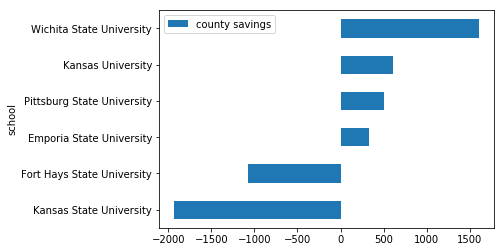

In [51]:
df = df.sort_values("county savings")

df.plot(kind="barh",y="county savings")

,county,county median estimate,dorm rates,county savings
school,,,,
Kansas State University,Riley,6880.5,4950,-1930.5
Fort Hays State University,Ellis,4941.0,3864,-1077.0
Emporia State University,Lyon,4365.0,4690,325.0
Pittsburg State University,Crawford,4923.0,5430,507.0
Kansas University,Douglas,5476.5,6084,607.5
Wichita State University,Sedgwick,5058.0,6660,1602.0
